   ## STEP-3 (Introducing dropouts)


    Target:

        -- In the previous step, the accuracy reduced to 99.24 because we reduced the parameters. In this step we want to
        improve this accuracy by using dropouts. We will use a dropout rate of 0.05

    Results:

        -- Parameters: 7,330
        -- Best Training Accuracy: 99.16
        -- Best Test Accuracy: 99.35

    Analysis:

        -- We can see that accuracy has increased from 99.24 to 99.35.
        -- The test accuracy is more than train accuracy because we are dropping 5% of the neurons in the training.


# Import Libraries

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
%cd 'drive/MyDrive/ERA_V1/Session_7_InDepth_Coding_Practice'

/content/drive/MyDrive/ERA_V1/Session_7_InDepth_Coding_Practice


In [3]:
from __future__ import print_function
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms

# Data Transformations



In [4]:
from data_transformers import Transforms
transforms_obj = Transforms()
train = transforms_obj.download_train_data()
test = transforms_obj.download_test_data()

# Train Test Dataloaders




In [5]:
from train_test_loaders import Train_Test_Dataloaders
train_test_dataloaders_obj = Train_Test_Dataloaders()

train_loader = train_test_dataloaders_obj.get_train_dataloader(train)
test_loader = train_test_dataloaders_obj.get_test_dataloader(test)

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


# The Model

$$n_{out} = \lfloor \frac{n_{in} + 2p - k}{s} \rfloor + 1$$

$$j_{out} = j{_in}*s$$

$$r_{out} = r_{in} + (k-1)*j_{in}$$


**n_in:** number of input features

**n_out:** number of output features

**k:** kernel_size

**s:** stride

**p:** padding

**j_in:** jump in

**j_out:** jump out

**r_in:** in receptive field

**r_out:** out receptive field

In [6]:
!pip install torchsummary
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
cuda


In [7]:
from models import Model3
model = Model3().to(device)
summary(model, input_size=(1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 10, 26, 26]              90
              ReLU-2           [-1, 10, 26, 26]               0
       BatchNorm2d-3           [-1, 10, 26, 26]              20
           Dropout-4           [-1, 10, 26, 26]               0
            Conv2d-5           [-1, 10, 24, 24]             900
              ReLU-6           [-1, 10, 24, 24]               0
       BatchNorm2d-7           [-1, 10, 24, 24]              20
           Dropout-8           [-1, 10, 24, 24]               0
            Conv2d-9           [-1, 12, 22, 22]           1,080
             ReLU-10           [-1, 12, 22, 22]               0
      BatchNorm2d-11           [-1, 12, 22, 22]              24
          Dropout-12           [-1, 12, 22, 22]               0
           Conv2d-13           [-1, 14, 20, 20]           1,512
             ReLU-14           [-1, 14,

# Let's Train and test our model

In [8]:
from train_test import Train_Test
train_test_obj = Train_Test()

train_losses, test_losses, train_acc, test_acc = train_test_obj.train_and_test_model(model, device, 15, train_loader, test_loader)

EPOCH: 0


loss=0.09464093297719955 Batch_id=468 Accuracy=88.14: 100%|██████████| 469/469 [00:23<00:00, 20.10it/s]



 Test set: Average loss: 0.0956, Accuracy: 9735/10000 (97.35%)

EPOCH: 1


loss=0.026676731184124947 Batch_id=468 Accuracy=97.70: 100%|██████████| 469/469 [00:18<00:00, 25.93it/s]



 Test set: Average loss: 0.0490, Accuracy: 9854/10000 (98.54%)

EPOCH: 2


loss=0.06880404055118561 Batch_id=468 Accuracy=98.26: 100%|██████████| 469/469 [00:19<00:00, 24.13it/s]



 Test set: Average loss: 0.0351, Accuracy: 9900/10000 (99.00%)

EPOCH: 3


loss=0.035476259887218475 Batch_id=468 Accuracy=98.51: 100%|██████████| 469/469 [00:17<00:00, 26.07it/s]



 Test set: Average loss: 0.0367, Accuracy: 9886/10000 (98.86%)

EPOCH: 4


loss=0.10639187693595886 Batch_id=468 Accuracy=98.71: 100%|██████████| 469/469 [00:19<00:00, 23.91it/s]



 Test set: Average loss: 0.0322, Accuracy: 9901/10000 (99.01%)

EPOCH: 5


loss=0.0438353605568409 Batch_id=468 Accuracy=98.82: 100%|██████████| 469/469 [00:18<00:00, 25.17it/s]



 Test set: Average loss: 0.0368, Accuracy: 9890/10000 (98.90%)

EPOCH: 6


loss=0.03007473610341549 Batch_id=468 Accuracy=98.79: 100%|██████████| 469/469 [00:18<00:00, 25.96it/s]



 Test set: Average loss: 0.0310, Accuracy: 9912/10000 (99.12%)

EPOCH: 7


loss=0.07976815849542618 Batch_id=468 Accuracy=98.97: 100%|██████████| 469/469 [00:19<00:00, 24.24it/s]



 Test set: Average loss: 0.0297, Accuracy: 9910/10000 (99.10%)

EPOCH: 8


loss=0.008618778549134731 Batch_id=468 Accuracy=98.98: 100%|██████████| 469/469 [00:18<00:00, 26.02it/s]



 Test set: Average loss: 0.0273, Accuracy: 9920/10000 (99.20%)

EPOCH: 9


loss=0.011555295437574387 Batch_id=468 Accuracy=99.02: 100%|██████████| 469/469 [00:19<00:00, 24.60it/s]



 Test set: Average loss: 0.0298, Accuracy: 9899/10000 (98.99%)

EPOCH: 10


loss=0.028397222980856895 Batch_id=468 Accuracy=99.10: 100%|██████████| 469/469 [00:17<00:00, 26.35it/s]



 Test set: Average loss: 0.0206, Accuracy: 9930/10000 (99.30%)

EPOCH: 11


loss=0.004301478620618582 Batch_id=468 Accuracy=99.11: 100%|██████████| 469/469 [00:17<00:00, 26.26it/s]



 Test set: Average loss: 0.0280, Accuracy: 9923/10000 (99.23%)

EPOCH: 12


loss=0.013098504394292831 Batch_id=468 Accuracy=99.08: 100%|██████████| 469/469 [00:20<00:00, 23.44it/s]



 Test set: Average loss: 0.0254, Accuracy: 9923/10000 (99.23%)

EPOCH: 13


loss=0.018751883879303932 Batch_id=468 Accuracy=99.14: 100%|██████████| 469/469 [00:17<00:00, 26.15it/s]



 Test set: Average loss: 0.0235, Accuracy: 9925/10000 (99.25%)

EPOCH: 14


loss=0.012503783218562603 Batch_id=468 Accuracy=99.16: 100%|██████████| 469/469 [00:18<00:00, 25.61it/s]



 Test set: Average loss: 0.0213, Accuracy: 9935/10000 (99.35%)



# Accuracy and Loss Visualisation

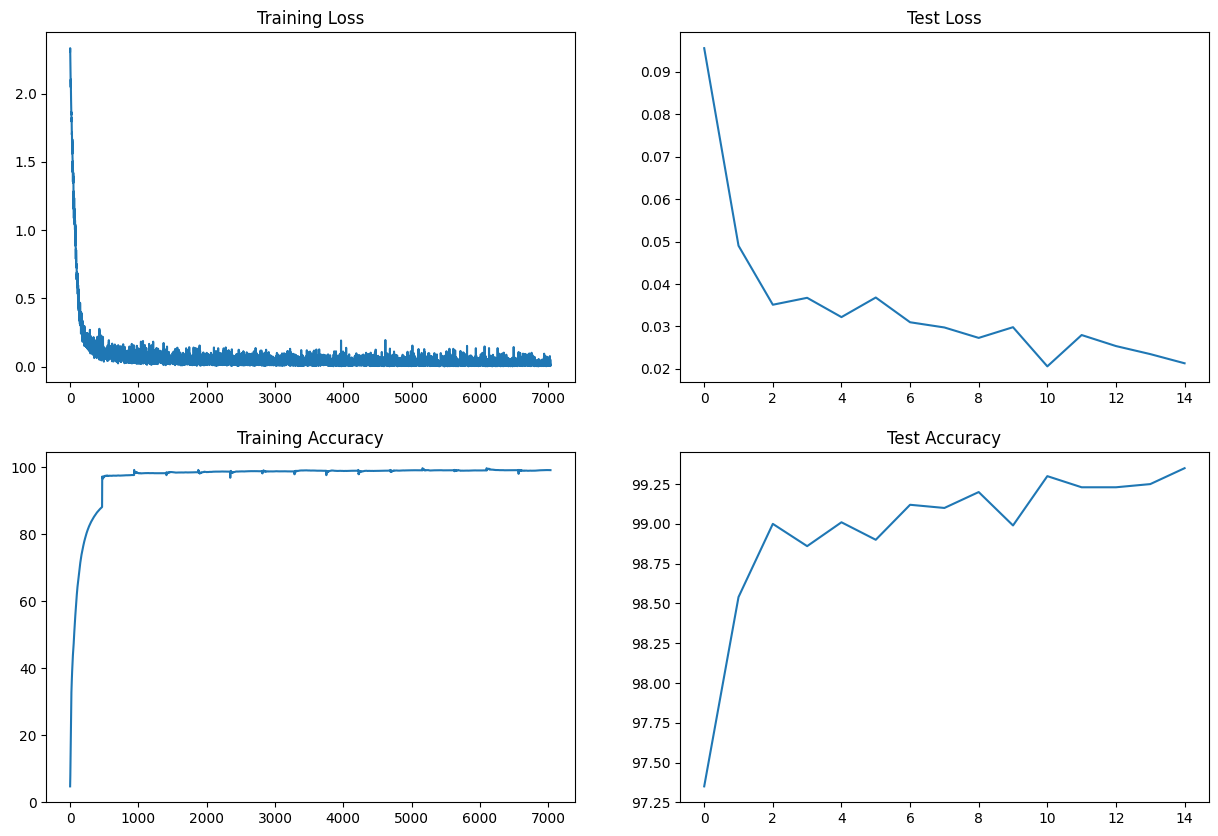

In [9]:
%matplotlib inline
from result_visualisation import Result_Visualisation
result_visualisation_obj = Result_Visualisation()
result_visualisation_obj.plot_accuracy_and_loss(train_losses, test_losses, train_acc, test_acc)